In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


**Install YOLOv8**

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on 27.01.2023 with version YOLOv8.0.20.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

**Inference with Pre-trained COCO Model**

💻 CLI

yolo mode=predict runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to runs/predict.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
2023-09-23 19:11:11.549538: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-23 19:11:12.422303: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 93.2ms
Speed: 0.7ms pre-process, 93.2ms inference, 122.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


/content


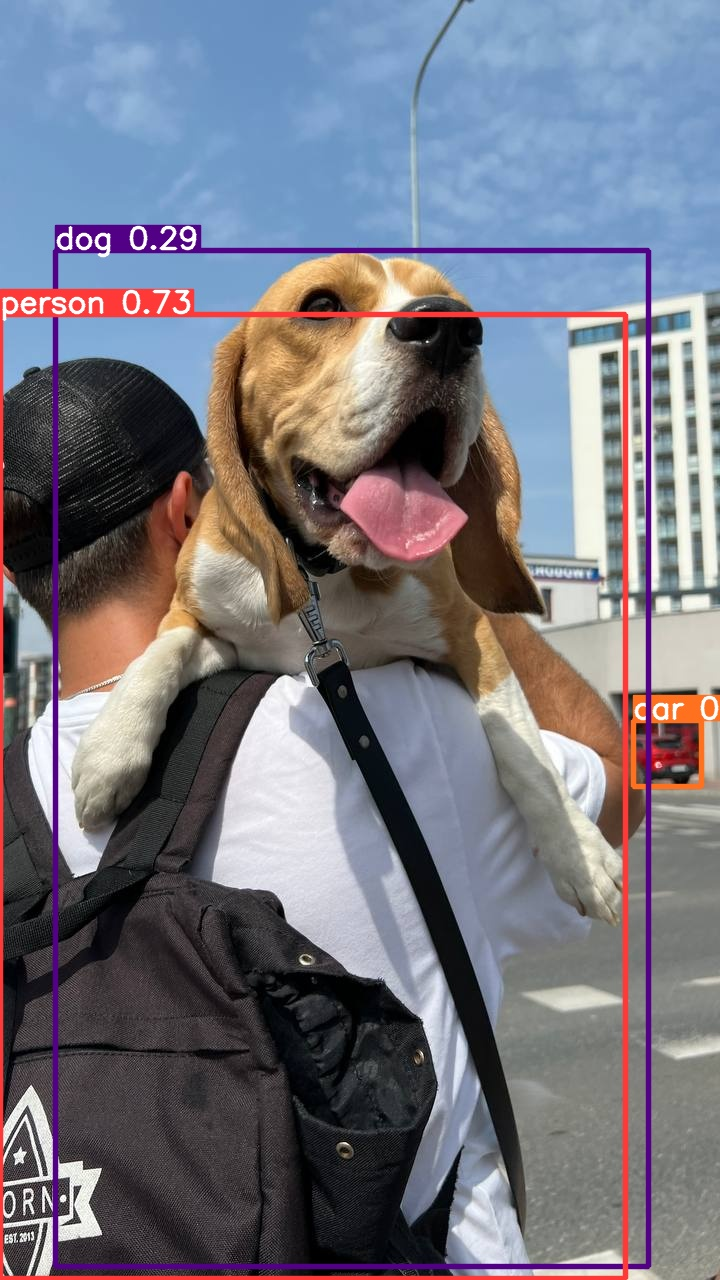

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

**Python SDK**

The simplest way of simply using YOLOv8 directly in a Python environment.



In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [ ]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.72713, 0.29066, 0.28456], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="vkvOU3i3e7eerOi0Yb2I")
project = rf.workspace("roshil-shrestha").project("soccer-vision-upskiiling")
dataset = project.version(1).download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Soccer-vision-upskiiling-1 in yolov8:: 100%|██████████| 242/242 [00:00<00:00, 4915.41it/s]


# **Custom Training**

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 79.8MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Soccer-vision-upskiiling-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscr

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1695496337.e831a32244f7.2995.0  train_batch2.jpg
F1_curve.png					    train_batch90.jpg
P_curve.png					    train_batch91.jpg
PR_curve.png					    train_batch92.jpg
R_curve.png					    val_batch0_labels.jpg
results.csv					    val_batch0_pred.jpg
results.png					    weights


/content


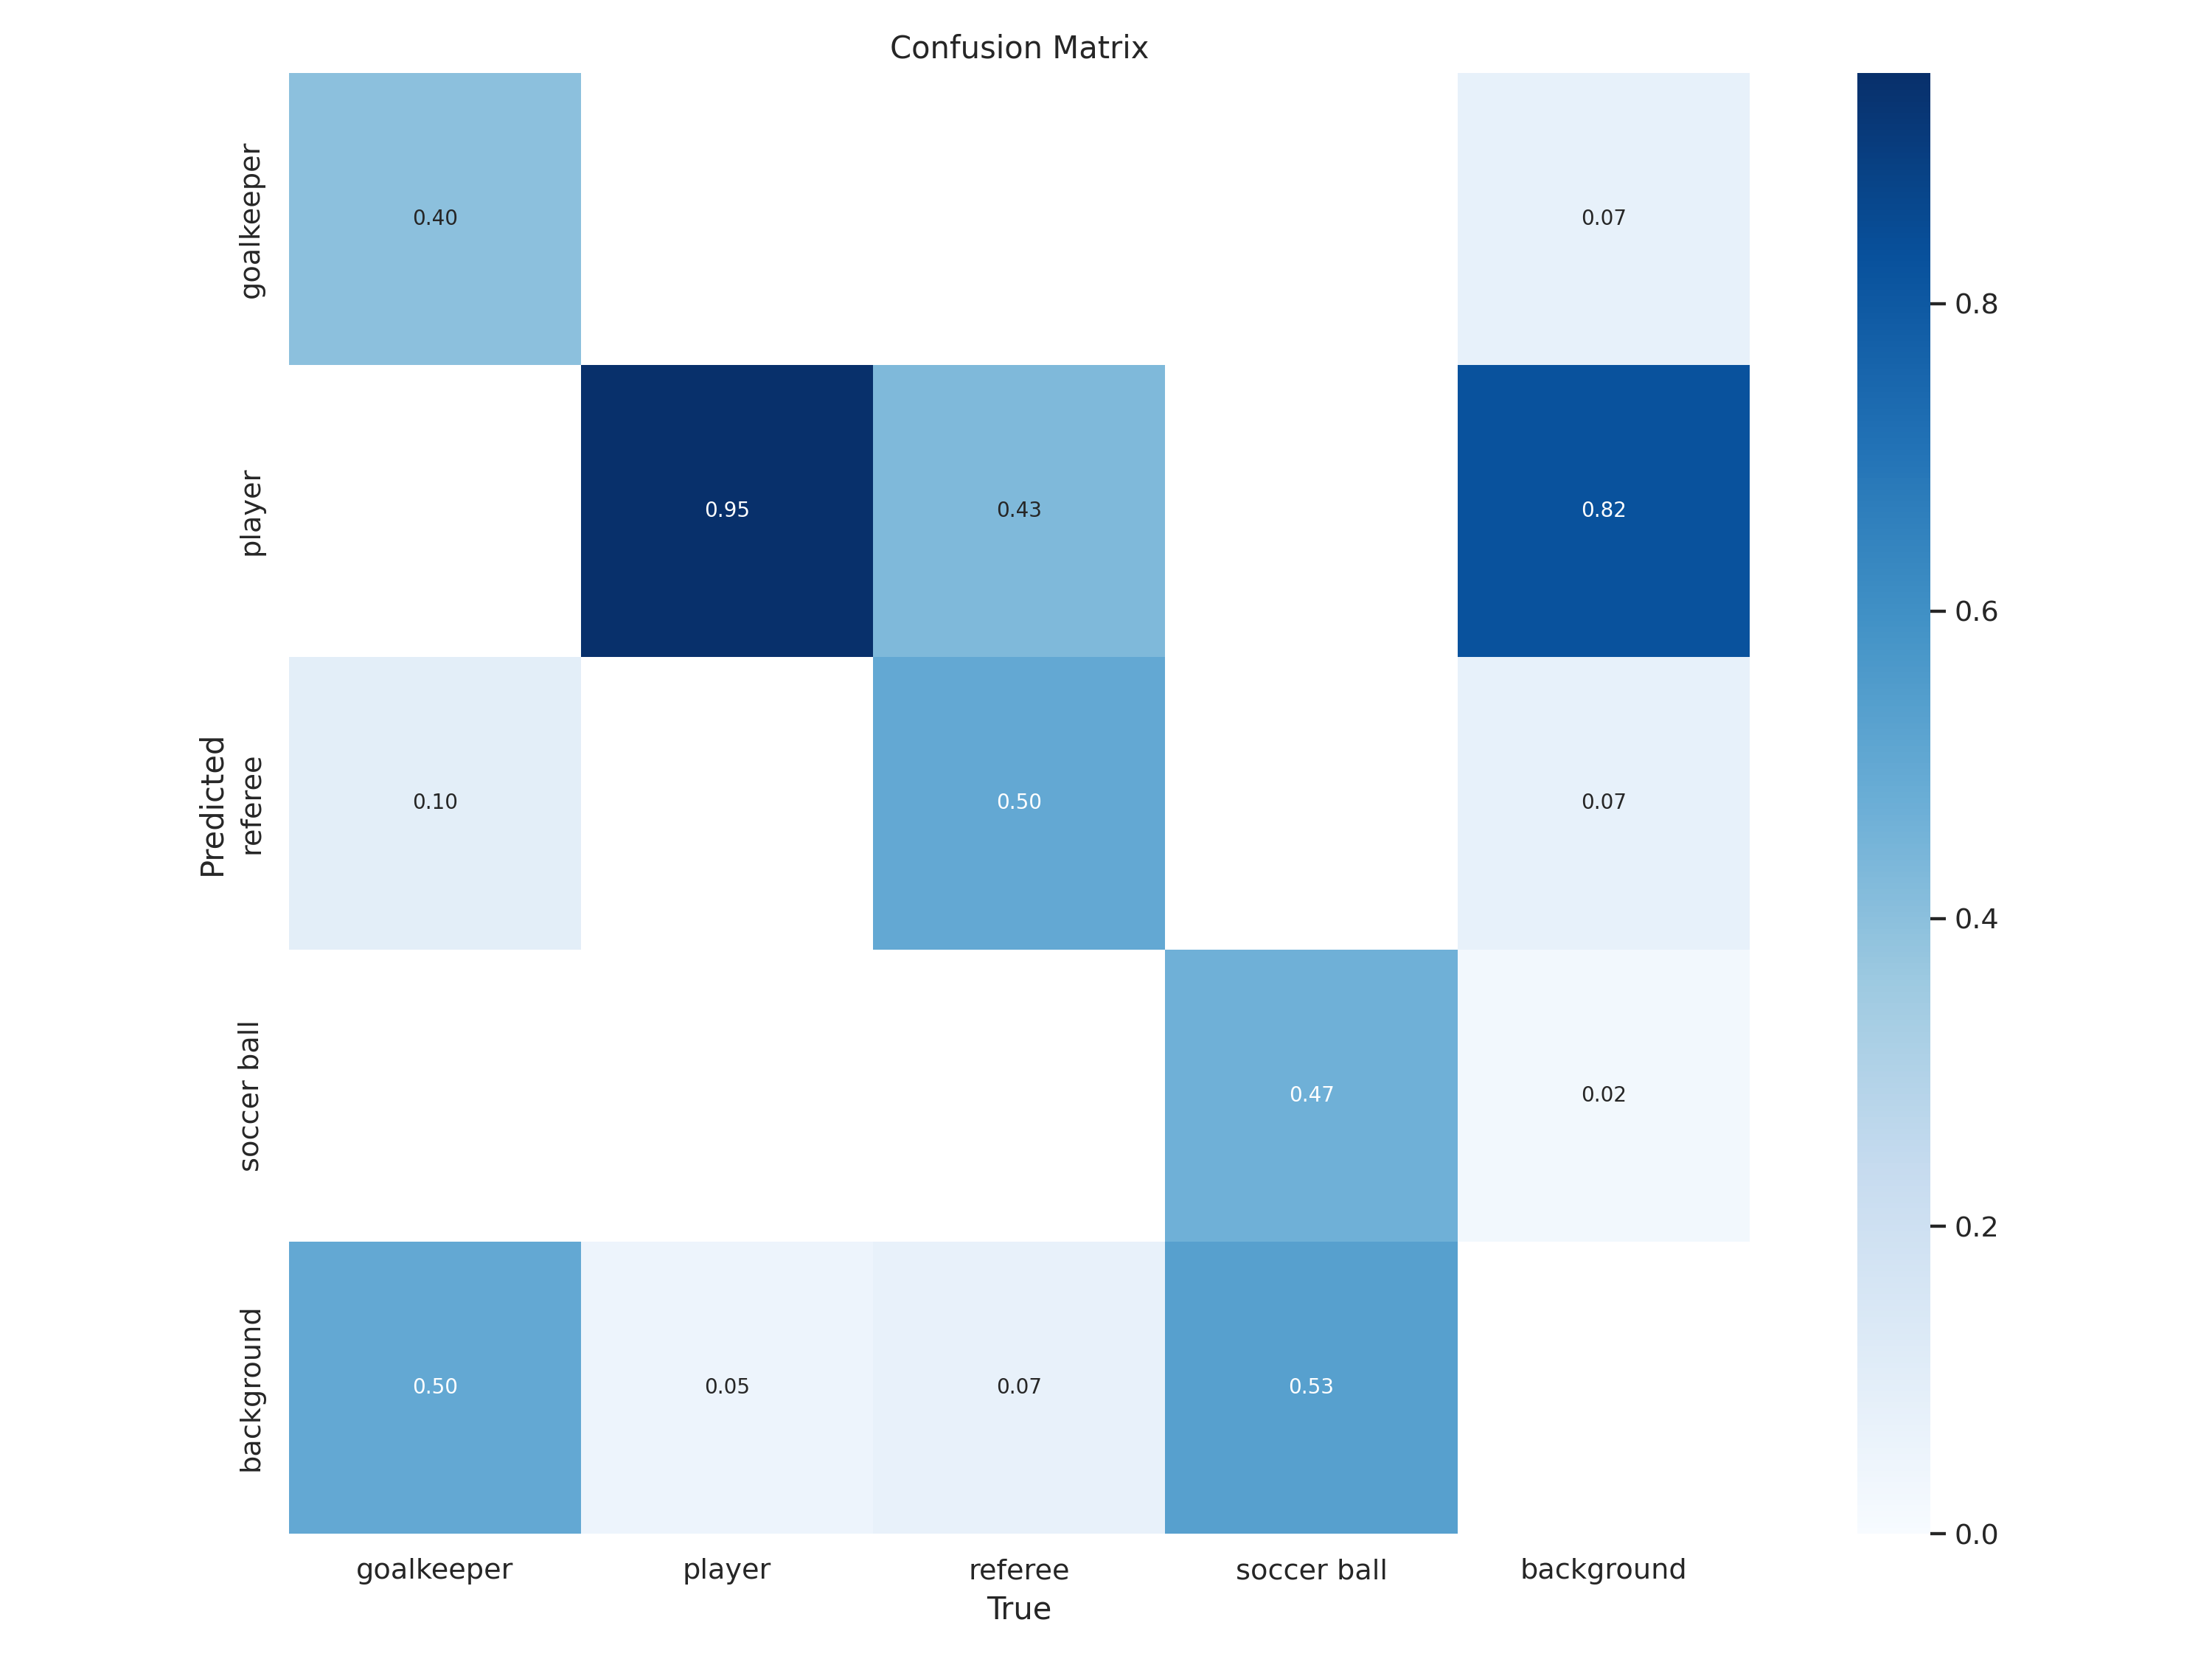

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


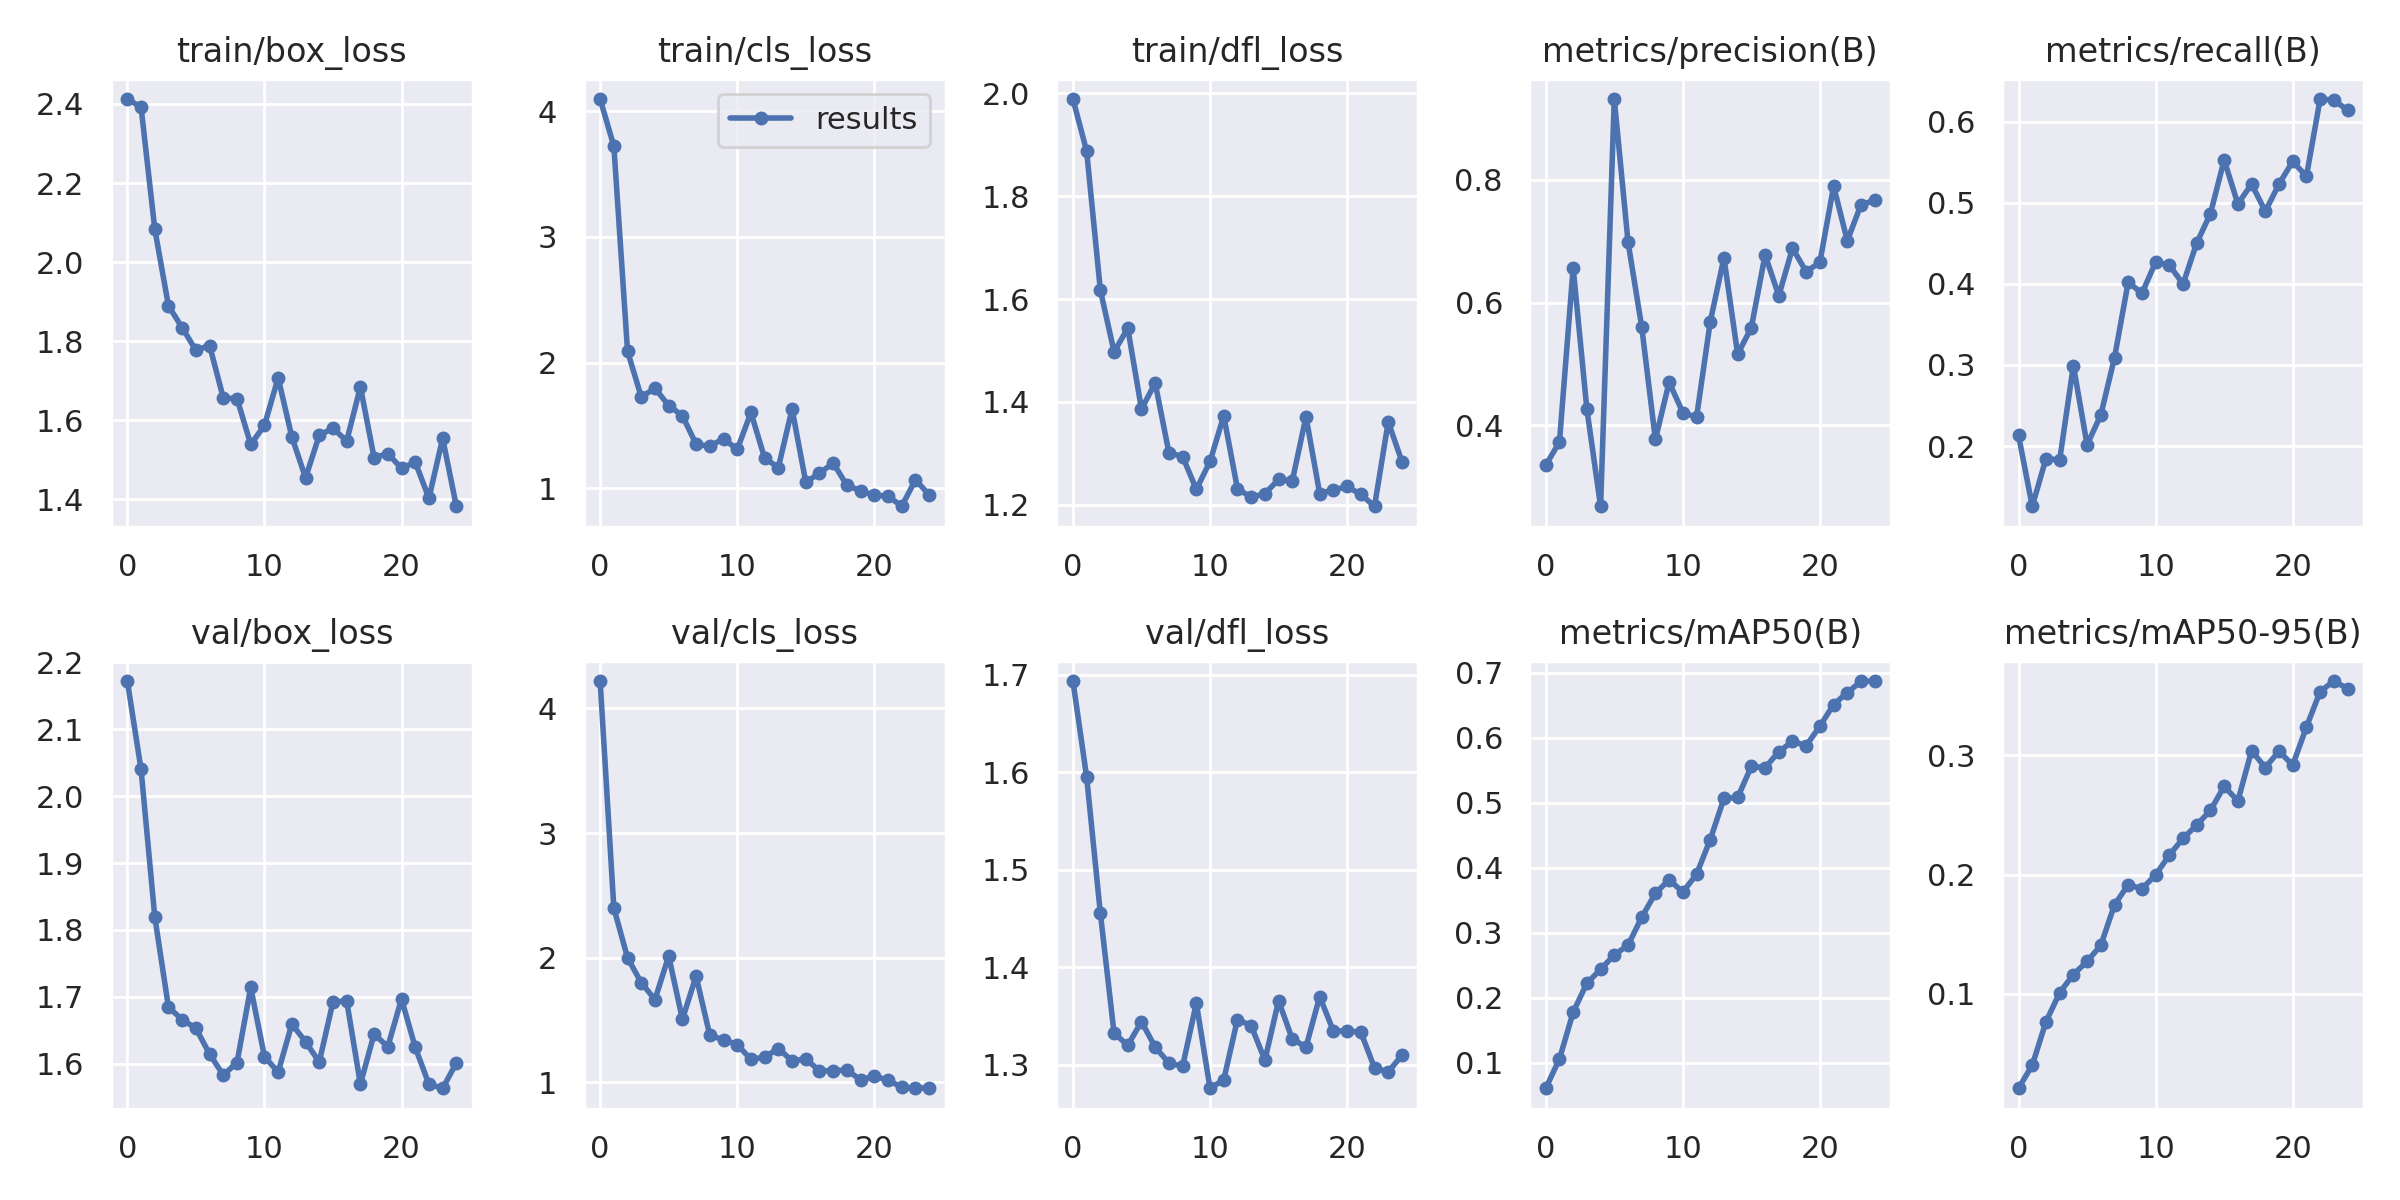

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


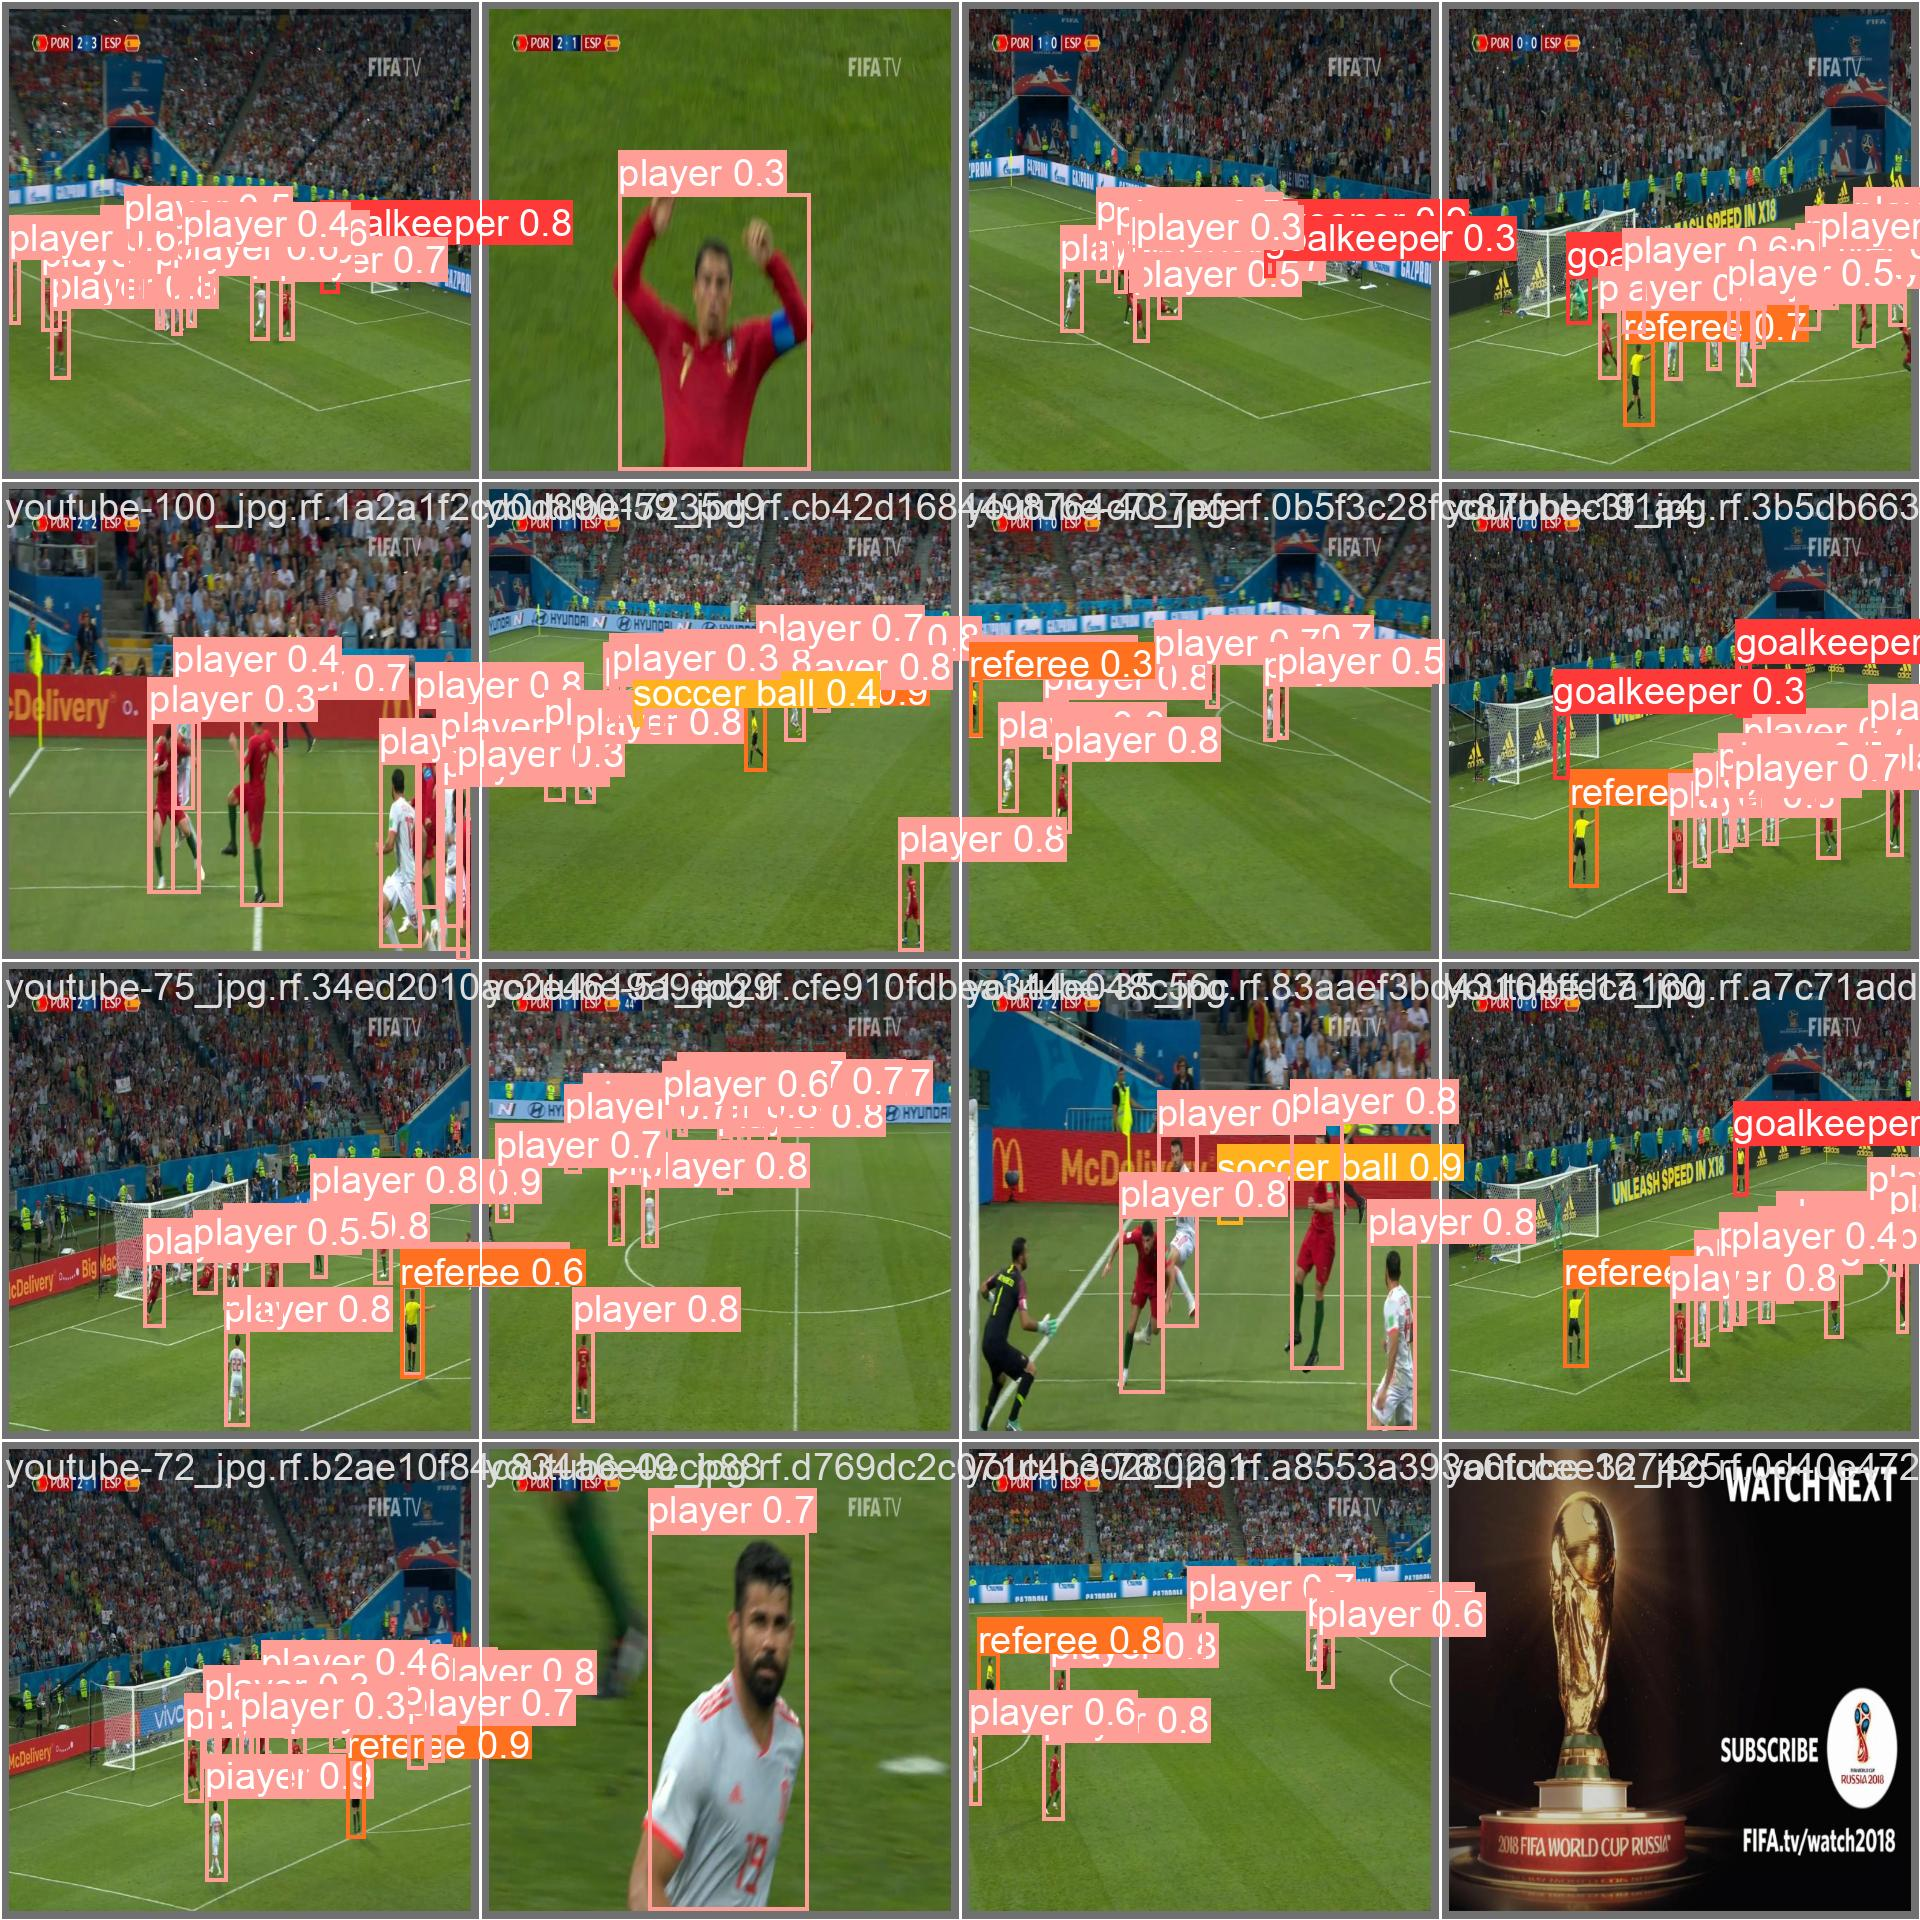

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

# **Validate Custom Model**

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-09-23 19:17:37.514762: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Soccer-vision-upskiiling-1/valid/labels.cache... 23 images, 1 backgrounds, 0 corrupt: 100% 23/23 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.11it/s]
                   all         23        199      0.763      0.626      0.686      0.361
            goalkeeper         23         10      0.566        0.4      0.394      0.192
                player         23        160      0.779      0.925       0.92      0.504
               referee         23         14      0.819      0.649      0.799      0.515
           soccer ball         23         15      0.888       0.53      0

# **Inference with Custom Model**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-09-23 19:18:07.026155: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/11 /content/datasets/Soccer-vision-upskiiling-1/test/images/youtube-112_jpg.rf.a89460ad55232f67e00dac9430d3f233.jpg: 800x800 14 players, 1 referee, 1 soccer ball, 24.6ms
image 2/11 /content/datasets/Soccer-vision-upskiiling-1/test/images/youtube-124_jpg.rf.fdf2ae689e24a6d6ecdc125da403fd1a.jpg: 800x800 24.7ms
image 3/11 /content/datasets/Soccer-vision-upskiiling-1/test/images/youtube-15_jpg.rf.7b6cc7173319c359a719102f551ec7b0.jpg: 800x800 1 goalkeeper, 12 players, 1 referee, 1 soccer ball, 24.6ms
image 4/11 /content/datasets/Soccer-vision-upskiiling-1/test/images/youtube-34_jpg.rf.6a85eaa51c48ca70d5c0025c8bca8208.jpg: 800x800 6 players, 1 referee, 1 soccer ball, 24.6ms
image 5/11 /co

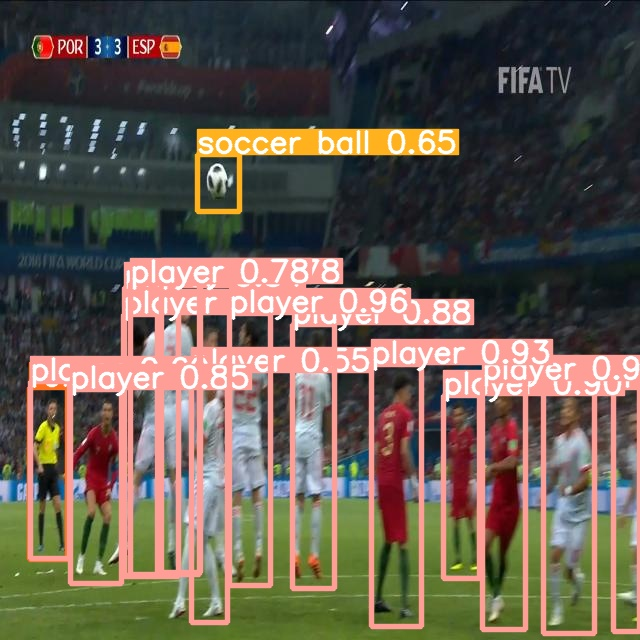

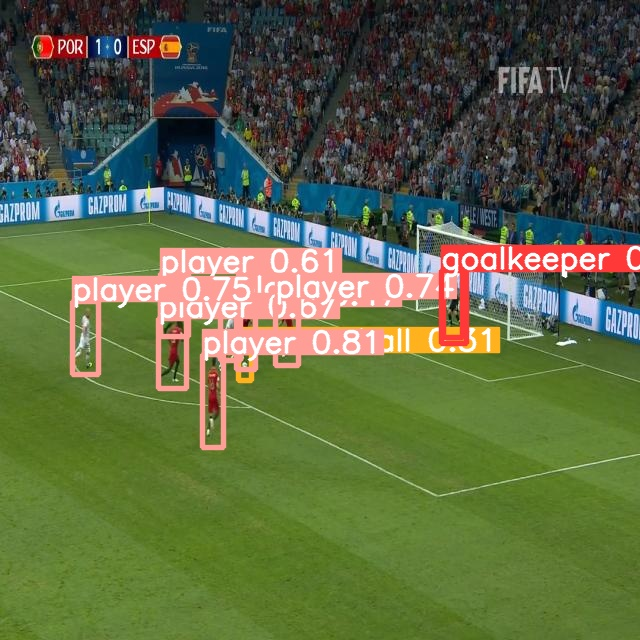

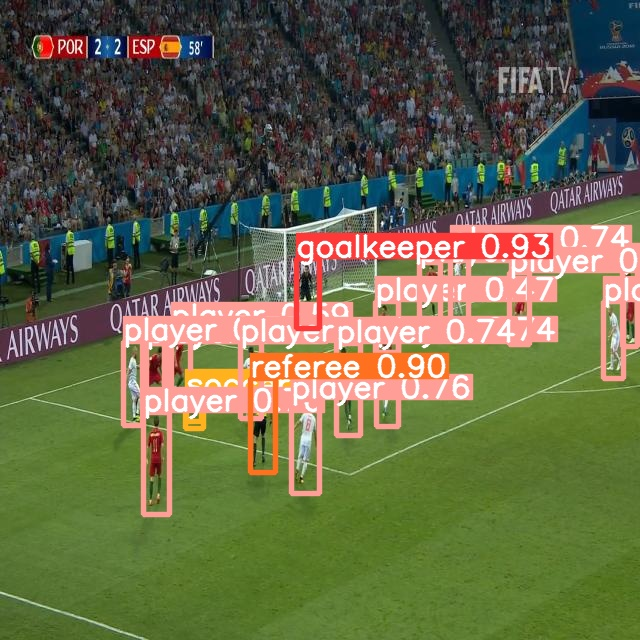

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

# **Deploy model on Roboflow**

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")


Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`
Would you like to continue with the wrong version of ultralytics? y/n: y
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on youtube-94_jpg.rf.ffaf25b760f5e8e2e6ed2e308c918536.jpg


{'predictions': [{'x': 521.0,
   'y': 161.0,
   'width': 52.0,
   'height': 146.0,
   'confidence': 0.9552688598632812,
   'class': 'player',
   'class_id': 1,
   'image_path': '/content/datasets/Soccer-vision-upskiiling-1/test/images/youtube-94_jpg.rf.ffaf25b760f5e8e2e6ed2e308c918536.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 444.0,
   'y': 158.0,
   'width': 44.0,
   'height': 166.0,
   'confidence': 0.9332572221755981,
   'class': 'player',
   'class_id': 1,
   'image_path': '/content/datasets/Soccer-vision-upskiiling-1/test/images/youtube-94_jpg.rf.ffaf25b760f5e8e2e6ed2e308c918536.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 353.5,
   'y': 163.0,
   'width': 49.0,
   'height': 238.0,
   'confidence': 0.9178471565246582,
   'class': 'player',
   'class_id': 1,
   'image_path': '/content/datasets/Soccer-vision-upskiiling-1/test/images/youtube-94_jpg.rf.ffaf25b760f5e8e2e6ed2e308c918536.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 65.5,